# Actividad Guiada 2 (Voy aplicar al 10/10)
# Wilmer Patricio Pujos Castro
#### Link GitHub Repository: https://github.com/patriciopujos/03MIAR---Algoritmos-de-Optimizacion/blob/7264d29f924649e6285009da0931bfae4ce97ae9/Algoritmos%20-%20Patricio%20Pujos%20-%20AG2.ipynb

Solución:  [1.1406816635889049e-46, -6.331930800016445e-47] 1.7020881342099205e-92


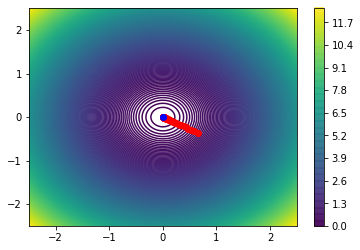

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt

#Función
f = lambda X : X[0]**2 + X[1]**2
df = lambda X : [2 * X[0] , 2 * X[1]]

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 300
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix,iy] = f([x,y])

contour = plt.contour(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

#Generar punto de partida aleatorio
P = [random.uniform(-rango,rango), random.uniform(-rango,rango)]
plt.plot(P[0], P[1], "o", c = "red")
TA = 0.05

for i in range(1000):
    grad = df(P)
    P[0], P[1] = P[0] - TA*grad[0], P[1] - TA*grad[1]
    plt.plot(P[0], P[1], "o", c = "red")

plt.plot(P[0], P[1], "o", c = "blue")
print("Solución: ", P, f(P))

$$\text{Dada la función, ajustar la tasa de aprendizaje del gradiente: } f(x) = sin(\frac{1}{2}x^{2} - \frac{1}{4} y^{2} +3). cos(2x+1-e^{y})$$

Solución:  [0.32274246216581765, 1.6024082724400914] -0.6574000294758535


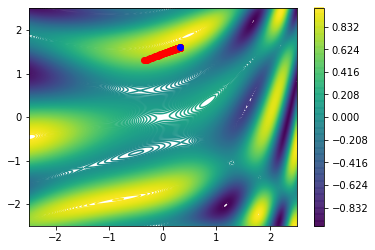

In [25]:
#Ejecutar los imports de la cabecera
#Función
f = lambda X : np.sin((1/2) * X[0]**2 - (1/4) * X[1]**2 + 3) * np.cos(2 * X[0] + 1 - np.e**X[1])
df = lambda X : [X[0] * np.cos((1/2) * X[0]**2 - (1/4) * X[1]**2 + 3) * np.cos(2*X[0] + 1 - np.e**X[1]) 
                 - 2 * np.sin(2*X[0] + 1 - np.e**X[1]) * np.sin((1/2) * X[0]**2 - (1/4) * X[1]**2 + 3),
                  np.e**X[1] * np.sin(2*X[0] + 1 - np.e**X[1]) * np.sin((1/2) * X[0]**2 -(1/4) * X[1]**2 + 3)
                  - (1/2) * X[1] * np.cos(2*X[0] + 1 - np.e**X[1]) * np.cos((1/2) * X[0]**2 -(1/4) * X[1]**2 + 3)]

#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 300
rango = 2.5
X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x in enumerate(X):
    for iy, y in enumerate(Y):
        Z[ix,iy] = f([x,y])

contour = plt.contour(X, Y, Z, resolucion)
cbar = plt.colorbar(contour)

#Generar punto de partida aleatorio
P = [random.uniform(-rango,rango), random.uniform(-rango,rango)]
plt.plot(P[0], P[1], "o", c = "red")
initial_TA = 0.05
#Radio de decaimiento
dec_ratio  = 0.95
#Numero de pasos
dec_steps = 100


for i in range(10000):
    grad = df(P)
    #Tasa de aprendizaje: ini_TA * radio ^ (paso/dec_steps)
    learning_rate = initial_TA * (dec_ratio ** (i/dec_steps))
    P[0], P[1] = P[0] - learning_rate*grad[0], P[1] - learning_rate*grad[1]
    plt.plot(P[0], P[1], "o", c = "red")

plt.plot(P[0], P[1], "o", c = "blue")
print("Solución: ", P, f(P))
